In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import string

In [2]:
df=pd.read_csv("ibm_churn_data.csv", na_values=' ', dtype= {'SeniorCitizen':'object','TotalCharges':'float64'})

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


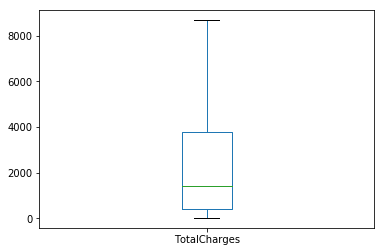

In [6]:
#checking boxplots for cheking outliers
boxplot_1=df.boxplot(column='TotalCharges',grid=False)

In [7]:
b=df.groupby(['SeniorCitizen','Churn']).count()['gender']

In [8]:
b

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: gender, dtype: int64

In [9]:
b=b.drop('0',axis=0)


In [10]:
b

SeniorCitizen  Churn
1              No       666
               Yes      476
Name: gender, dtype: int64

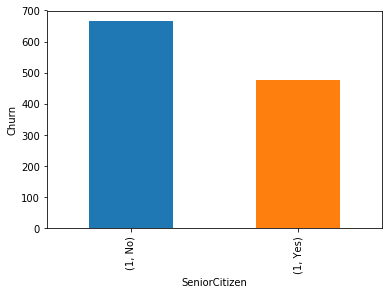

In [11]:
b.plot(kind='bar')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
#ax.Axes.set_xticklabels(labels=[0,1])
plt.show()


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
y= df.Churn
df_1=df.drop(['Churn','customerID'],axis=1)


In [66]:
df_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [67]:
df_1.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


In [68]:
df_1.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [69]:
df_1.shape

(7043, 19)

In [70]:
df_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [71]:
median_tc = df_1["TotalCharges"].median()
df_1["TotalCharges"].fillna(value=median_tc, inplace = True)

In [72]:
df_1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [73]:
#OHC
df_1=pd.get_dummies(df_1)


In [25]:
#df_final = pd.append(df_1, df2, left_index=False, right_index=false, how='left')
#df_final=pd.concat([df_final,y],axis=1)

In [74]:
df_1.shape

(7043, 46)

In [75]:
df_1.dtypes


tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [76]:
df_1.shape

(7043, 46)

In [77]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [78]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_1, y, test_size=0.30,random_state=0)

In [79]:
train_y.shape

(4930,)

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X,train_y)
prediction=lr.predict(test_X)
#predict=pd.Series(prediction)

C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
from sklearn.metrics import accuracy_score
score=accuracy_score(prediction,test_y)
print(score)

0.8026502602934217


In [60]:
print(prediction)

[0 0 0 ... 0 0 0]


In [83]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(train_X,train_y)
prediction_1=rc.predict(test_X)

C:\Users\eajamat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
score_1=accuracy_score(prediction_1,test_y)
print(score_1)

0.7818267865593942


In [87]:
importance =  rc.feature_importances_
columns = df_1.columns

In [92]:
dict_1 ={"columns": columns, "importance":importance}
feature_importance = pd.DataFrame(data = dict_1)

In [97]:
feature_importance.head()
feature_importance.sort_values(by='importance', ascending= False, inplace=True)

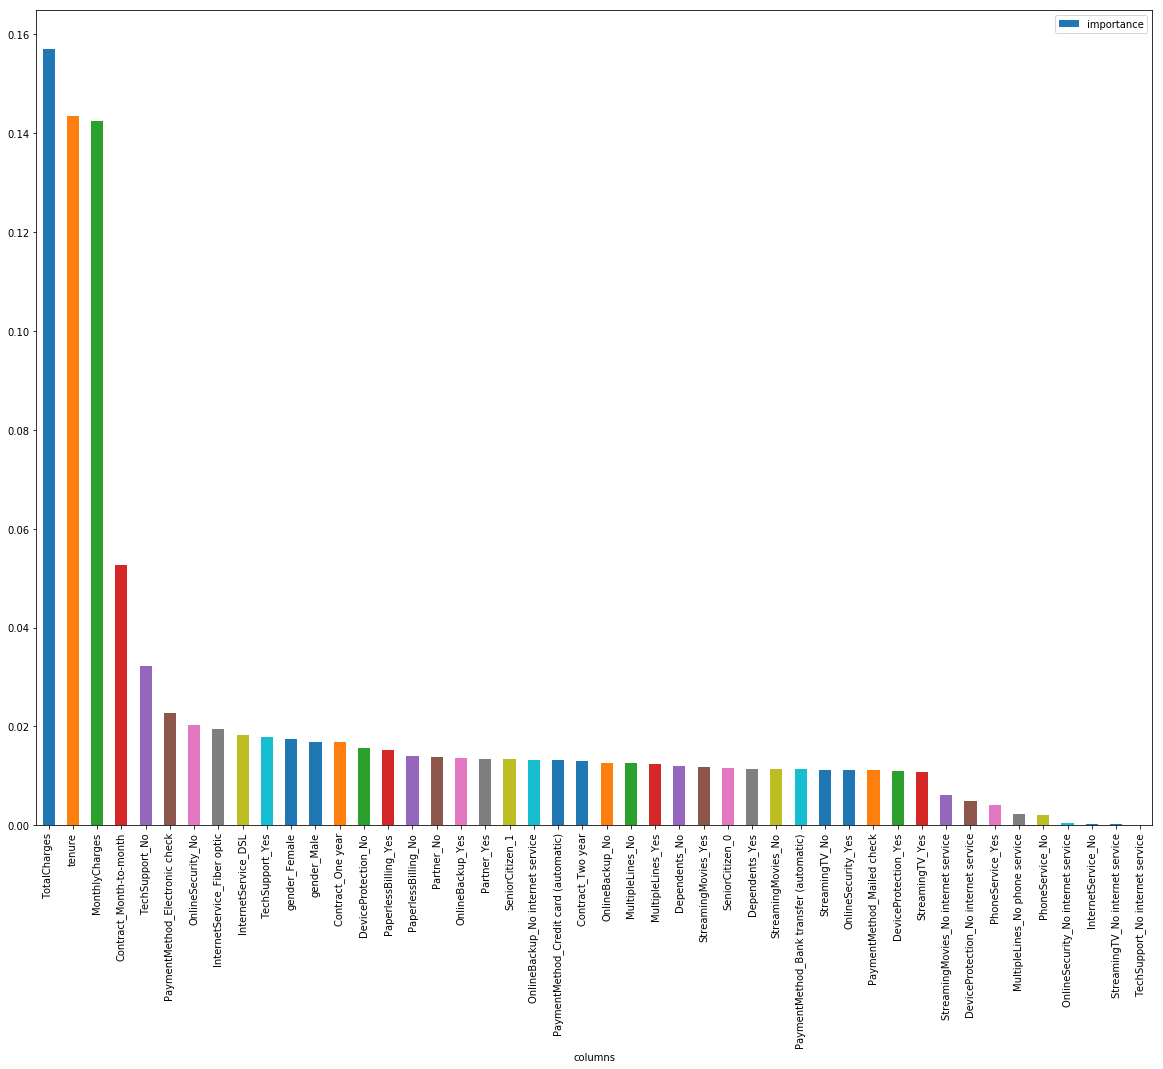

In [102]:
feature_importance.plot(x = 'columns', y = 'importance',kind='bar', figsize = (20, 15))
plt.show()